In [89]:
import tensorflow as tf 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [90]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [91]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in  gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [92]:
data_dir = 'C:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train'

In [93]:
image_exts = ['jpeg','jpg','bmp','png']

In [94]:
for folder in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, folder)):
        #print(image)
        pass

In [95]:
img = cv2.imread(os.path.join(data_dir, 'Angry', '01.jpg'))

In [96]:
img.shape

(224, 224, 3)

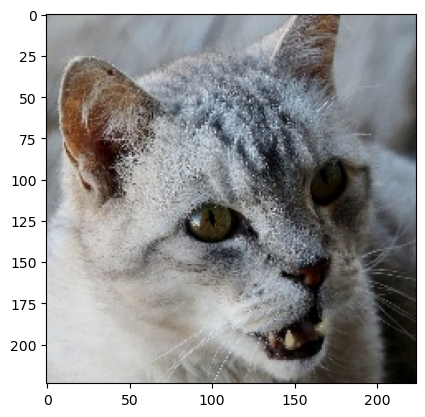

In [97]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [98]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in list exts".format(image_path))
                os.remove(image_path)
                
        except Exception as e:
            print("Issue with image{}". format(image_path))

Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train\Angry\01.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train\Angry\02.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train\Angry\03.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train\Angry\04.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train\Angry\05.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train\Angry\06.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train\Angry\07.jpg
Issue with imageC:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train\Angry\08.jpg
Issue with imageC:/Users

In [99]:
data = tf.keras.utils.image_dataset_from_directory('C:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/Master Folder/train')

Found 1074 files belonging to 4 classes.


In [100]:
data_iterator = data.as_numpy_iterator()

In [101]:
data_iterator

In [102]:
batch = data_iterator.next()

In [103]:
batch[1]

array([1, 3, 0, 0, 2, 3, 3, 0, 0, 3, 2, 1, 2, 3, 3, 0, 0, 2, 0, 1, 2, 0,
       2, 2, 2, 0, 1, 2, 0, 2, 3, 3])

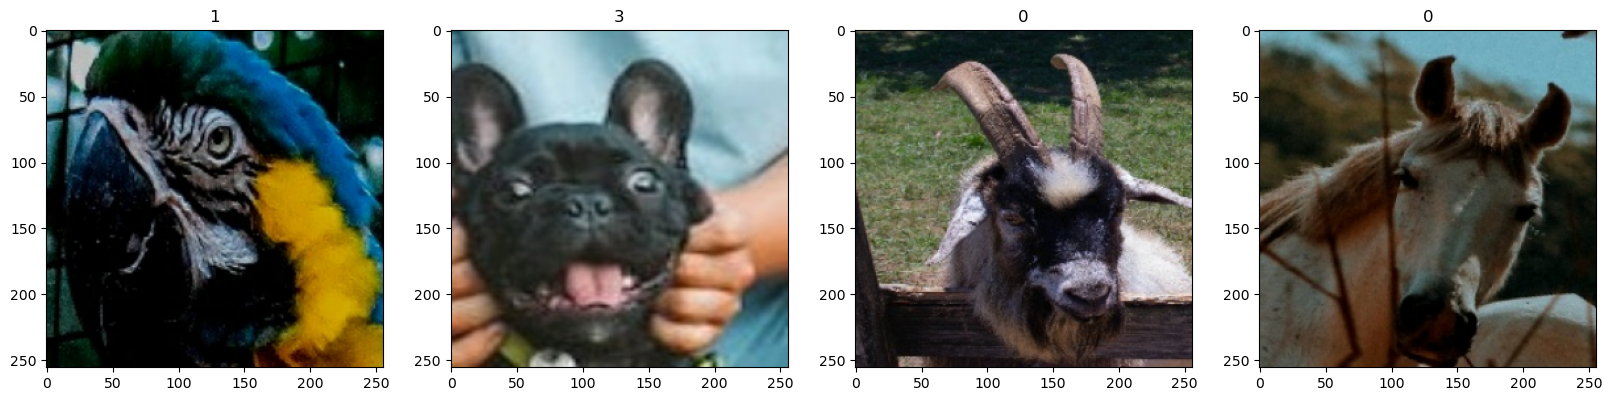

In [104]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [105]:
data = data.map(lambda x, y: (x/255, y))

In [106]:
scaled_iterator = data.as_numpy_iterator()

In [107]:
batch = data.as_numpy_iterator().next()

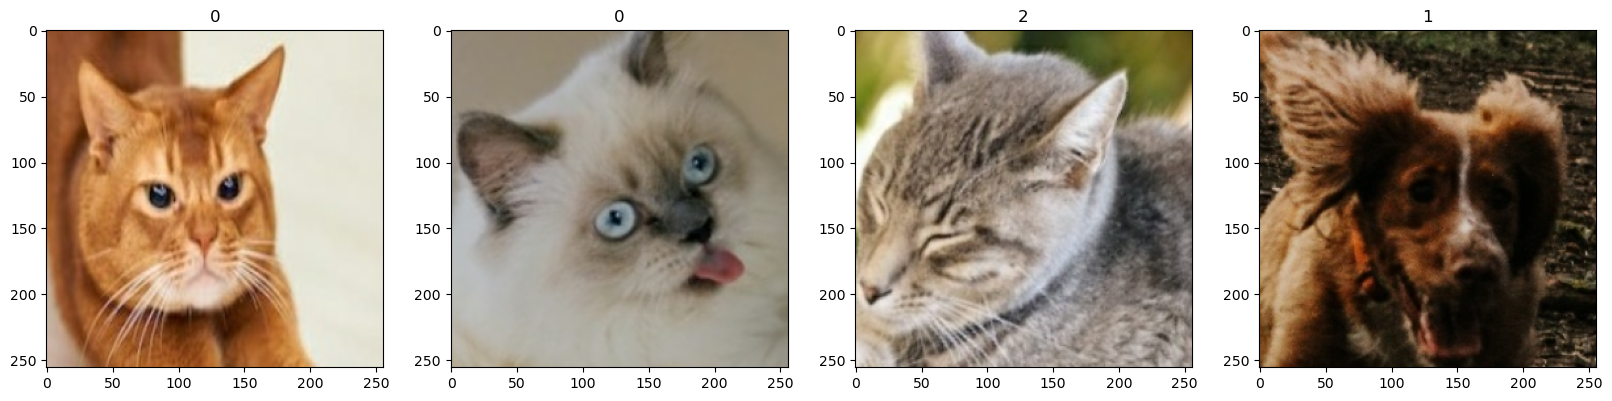

In [108]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [109]:
len(data)

34

In [110]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [111]:
val_size + test_size + train_size

34

In [112]:
train_set = data.take(train_size)
val_set = data.skip(train_size).take(val_size)
test_set = data.skip(val_size + train_size).take(test_size)

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [114]:
model = Sequential()

In [115]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256,3)))
model.add(MaxPooling2D())

In [116]:
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [117]:
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

In [118]:
model.add(Flatten())

In [119]:
model.add(Dense(256, activation='relu'))

In [120]:
model.add(Dense(256, activation='relu'))

In [121]:
model.add(Dense(4, activation='softmax'))

In [122]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [124]:
logdir = 'C:/Users/abdir/OneDrive/Desktop/Kaggle-Competition/Animal-classification/logdir'

In [125]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [126]:
hist = model.fit(train_set, epochs=20, validation_data = val_set, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 38s 2s/step - loss: 1.4150 - accuracy: 0.2418 - val_loss: 1.3782 - val_accuracy: 0.2812
Epoch 2/20
23/23 [==============================] - 36s 2s/step - loss: 1.3752 - accuracy: 0.3043 - val_loss: 1.3929 - val_accuracy: 0.2857
Epoch 3/20
23/23 [==============================] - 38s 2s/step - loss: 1.3676 - accuracy: 0.3478 - val_loss: 1.3590 - val_accuracy: 0.2768
Epoch 4/20
23/23 [==============================] - 37s 2s/step - loss: 1.2864 - accuracy: 0.3995 - val_loss: 1.2458 - val_accuracy: 0.3884
Epoch 5/20
23/23 [==============================] - 38s 2s/step - loss: 1.1551 - accuracy: 0.5027 - val_loss: 1.1406 - val_accuracy: 0.5357
Epoch 6/20
23/23 [==============================] - 37s 2s/step - loss: 0.8996 - accuracy: 0.6522 - val_loss: 1.0560 - val_accuracy: 0.5536
Epoch 7/20
23/23 [==============================] - 37s 2s/step - loss: 0.6587 - accuracy: 0.7446 - val_loss: 0.9630 - val_accuracy: 0.6384
Epoch 8/20
23/23 [==

In [128]:
hist.history

{'loss': [1.4150077104568481,
  1.3752154111862183,
  1.3675533533096313,
  1.2863616943359375,
  1.1550945043563843,
  0.8996291756629944,
  0.6586977243423462,
  0.35747677087783813,
  0.22748078405857086,
  0.19793657958507538,
  0.16159315407276154,
  0.1605253368616104,
  0.09955859184265137,
  0.09815840423107147,
  0.04632062092423439,
  0.028812460601329803,
  0.03240593150258064,
  0.015646059066057205,
  0.006089908070862293,
  0.029719844460487366],
 'accuracy': [0.24184782803058624,
  0.30434781312942505,
  0.3478260934352875,
  0.39945653080940247,
  0.5027173757553101,
  0.6521739363670349,
  0.7445651888847351,
  0.8817934989929199,
  0.9347826242446899,
  0.9551630616188049,
  0.9619565010070801,
  0.9633151888847351,
  0.9660326242446899,
  0.970108687877655,
  0.9945651888847351,
  0.99048912525177,
  0.9932065010070801,
  0.9972826242446899,
  0.998641312122345,
  0.9945651888847351],
 'val_loss': [1.3781999349594116,
  1.3929120302200317,
  1.3589588403701782,
  1.2